In [2]:
import matplotlib.pyplot as plt
import torch

# Regression with Neural Networks in PyTorch

https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

In [3]:
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

Text(0, 0.5, 'Dependent varible')

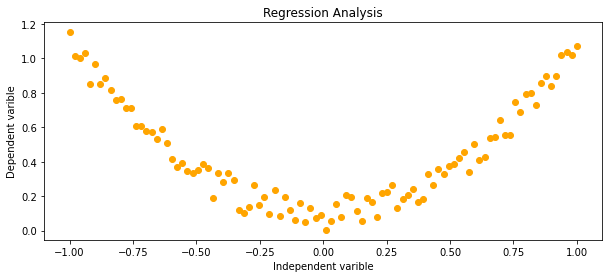

In [4]:
torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x), Variable(y)

plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')

In [5]:
# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [7]:
# train
for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction, y) # network output, target
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients
    optimizer.step() # apply gradients

Text(0.0, 1.0, 'Loss = 0.0074')

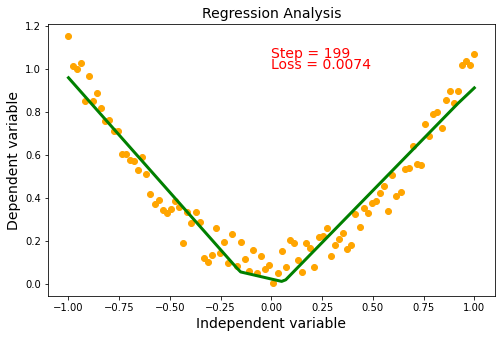

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Regression Analysis', fontsize=14)
ax.set_xlabel('Independent variable', fontsize=14)
ax.set_ylabel('Dependent variable', fontsize=14)
#ax.set_xlim(-1.05, 1.5)
#ax.set_ylim(-0.25, 1.25)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
ax.text(0.0, 1.05, 'Step = %d' % t, fontdict={'size': 14, 'color':  'red'})
ax.text(0.0, 1.0, 'Loss = %.4f' % loss.data.numpy(),
        fontdict={'size': 14, 'color':  'red'})

In [9]:
BATCH_SIZE = 20

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [10]:
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


In [11]:
# train
EPOCH = 10
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
torch.Size([64, 1])
torch.Size([36, 1])
